In [49]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, shapiro, mannwhitneyu, f_oneway
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import r2_score


In [28]:
# Wczytanie danych do DataFrame
file_path = 'HistoricalQuotes.csv'
data = pd.read_csv(file_path)
data

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23
...,...,...,...,...,...,...
2513,03/05/2010,$31.2786,224647427,$30.7057,$31.3857,$30.6614
2514,03/04/2010,$30.1014,89591907,$29.8971,$30.1314,$29.8043
2515,03/03/2010,$29.9043,92846488,$29.8486,$29.9814,$29.7057
2516,03/02/2010,$29.8357,141486282,$29.99,$30.1186,$29.6771


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2518 non-null   object
 1    Close/Last  2518 non-null   object
 2    Volume      2518 non-null   int64 
 3    Open        2518 non-null   object
 4    High        2518 non-null   object
 5    Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


In [30]:
# Usuń spacje z nazw kolumn
data.columns = data.columns.str.strip()

# Usuń znak dolara i konwertuj na liczby zmiennoprzecinkowe
data['Close/Last'] = data['Close/Last'].str.strip().str.replace(r'\$', '', regex=True).astype(float)
data['Open'] = data['Open'].str.strip().str.replace(r'\$', '', regex=True).astype(float)
data['High'] = data['High'].str.strip().str.replace(r'\$', '', regex=True).astype(float)
data['Low'] = data['Low'].str.strip().str.replace(r'\$', '', regex=True).astype(float)


In [31]:
data

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,273.3600,106721200,257.2600,278.4100,256.3700
1,02/27/2020,273.5200,80151380,281.1000,286.0000,272.9600
2,02/26/2020,292.6500,49678430,286.5300,297.8800,286.5000
3,02/25/2020,288.0800,57668360,300.9500,302.5300,286.1300
4,02/24/2020,298.1800,55548830,297.2600,304.1800,289.2300
...,...,...,...,...,...,...
2513,03/05/2010,31.2786,224647427,30.7057,31.3857,30.6614
2514,03/04/2010,30.1014,89591907,29.8971,30.1314,29.8043
2515,03/03/2010,29.9043,92846488,29.8486,29.9814,29.7057
2516,03/02/2010,29.8357,141486282,29.9900,30.1186,29.6771


In [32]:
# Wyznaczanie podstawowych parametrów statystycznych
basic_stats = data.describe()
print("Podstawowe parametry statystyczne:")
print(basic_stats)


Podstawowe parametry statystyczne:
        Close/Last        Volume         Open         High          Low
count  2518.000000  2.518000e+03  2518.000000  2518.000000  2518.000000
mean    114.769522  7.258009e+07   114.728443   115.766415   113.690582
std      60.662405  5.663113e+07    60.546893    61.134456    60.085105
min      29.835700  1.136205e+07    29.392800    29.928600    28.464300
25%      66.822475  3.053026e+07    66.877150    67.475300    66.372950
50%     101.090000  5.295469e+07   101.115000   102.085000   100.350000
75%     154.630000  9.861006e+07   154.610000   155.735000   153.325000
max     327.200000  4.624423e+08   324.740000   327.850000   323.350000


In [33]:
# Upewnij się, że kolumna 'Date' ma typ datetime
data['Date'] = pd.to_datetime(data['Date'])

# Dodaj kolumnę z rokiem
data['Year'] = data['Date'].dt.year

# Wybierz dane z 2020 roku i wcześniejsze
data_2020 = data[data['Year'] == 2020]['Close/Last']
data_2019 = data[data['Year'] < 2020]['Close/Last']
data

,Date,Close/Last,Volume,Open,High,Low,Year
0,2020-02-28,273.3600,106721200,257.2600,278.4100,256.3700,2020
1,2020-02-27,273.5200,80151380,281.1000,286.0000,272.9600,2020
2,2020-02-26,292.6500,49678430,286.5300,297.8800,286.5000,2020
3,2020-02-25,288.0800,57668360,300.9500,302.5300,286.1300,2020
4,2020-02-24,298.1800,55548830,297.2600,304.1800,289.2300,2020
...,...,...,...,...,...,...,...
2513,2010-03-05,31.2786,224647427,30.7057,31.3857,30.6614,2010
2514,2010-03-04,30.1014,89591907,29.8971,30.1314,29.8043,2010
2515,2010-03-03,29.9043,92846488,29.8486,29.9814,29.7057,2010
2516,2010-03-02,29.8357,141486282,29.9900,30.1186,29.6771,2010


## Testy parametryczne: test T-studenta

#### Hipoteza zerowa (H₀): Średnia cen giełdowych w roku 2020 nie różni się istotnie względem cen giełdowych w roku 2019
#### Hipoteza alternatywna (H₁): Średnia cen giełdowych w roku 2020 jest istotnie wieksza od cen giełdowych w 2019

Test t jest najbardziej powszechnie stosowaną metodą oceny różnic między średnimi w dwóch grupach.

### Sprawdzenie normalności rozkładu (testem Shapiro-Wilka)
Jedynym warunkiem jest normalność rozkładu zmiennych oraz brak istotnych różnic między wariancjami

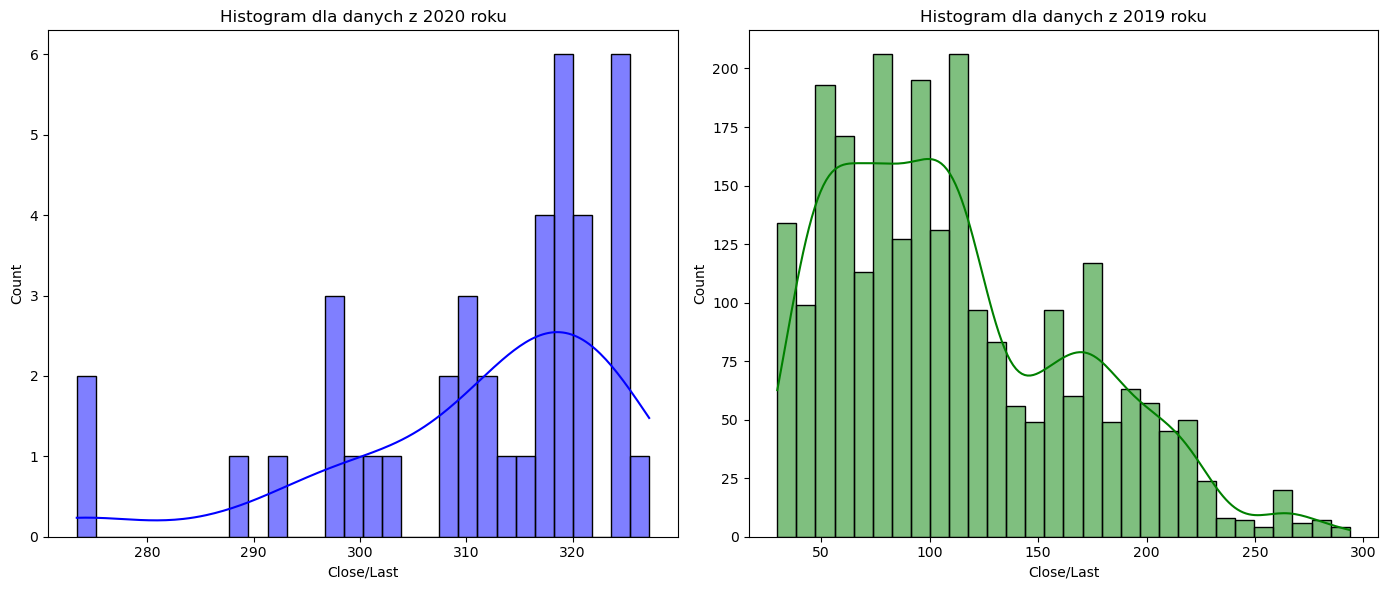

Test normalności dla danych z 2020 roku: Statystyka = 0.8593702315898601, p-value = 0.00015315563250292455
Test normalności dla danych z 2019 roku: Statystyka = 0.9424814442238691, p-value = 5.0134010704408965e-30


In [34]:

# Tworzenie histogramów dla danych z 2020 i 2019 roku
plt.figure(figsize=(14, 6))

# Histogram dla danych z 2020 roku
plt.subplot(1, 2, 1)
sns.histplot(data_2020, kde=True, color='blue', bins=30)
plt.title('Histogram dla danych z 2020 roku')

# Histogram dla danych z 2019 roku
plt.subplot(1, 2, 2)
sns.histplot(data_2019, kde=True, color='green', bins=30)
plt.title('Histogram dla danych z 2019 roku')

plt.tight_layout()
plt.show()

# Test normalności (test Shapiro-Wilka)
shapiro_test_2020 = stats.shapiro(data_2020)
shapiro_test_2019 = stats.shapiro(data_2019)

print(f"Test normalności dla danych z 2020 roku: Statystyka = {shapiro_test_2020[0]}, p-value = {shapiro_test_2020[1]}")
print(f"Test normalności dla danych z 2019 roku: Statystyka = {shapiro_test_2019[0]}, p-value = {shapiro_test_2019[1]}")

Test normalności dla danych z 2020 roku:
Statystyka testu: 0.85937
p-value: 0.000153
Interpretacja:
Test Shapiro-Wilka ma hipotezę zerową, która mówi, że dane mają rozkład normalny. Jeśli wartość p jest mniejsza niż wybrany poziom istotności (zwykle 0.05), odrzucamy hipotezę zerową i wnioskujemy, że dane nie mają rozkładu normalnego.
Wartość p = 0.000153 jest znacznie mniejsza niż 0.05, więc odrzucamy hipotezę o normalności i stwierdzamy, że dane z 2020 roku nie mają rozkładu normalnego.


Test normalności dla danych z 2019 roku:
Statystyka testu: 0.94248
p-value: 5.0134e-30 (czyli bardzo bliskie 0)
Interpretacja:
Tak jak w poprzednim przypadku, wartość p jest znacznie mniejsza niż 0.05. Wartość p jest bliska zeru, co oznacza, że odrzucamy hipotezę o normalności i wnioskujemy, że dane z 2019 roku również nie mają rozkładu normalnego.

W obu przypadkach (2019 i 2020 rok) p-value jest znacznie mniejsze niż 0.05, co prowadzi do wniosku, że dane nie są rozkładem normalnym. Oznacza to, że nie możemy przyjąć założenia o normalności tych danych, co może sugerować, że rozkład cen akcji w tych latach jest inny. Więc odrzucamy hiptoze zerową 

## Test Levene’a
Test Levene’a sprawdza, czy wariancje w dwóch (lub więcej) grupach są równe. Hipotezy dla tego testu są następujące:

#### Hipoteza zerowa (H₀): Wariancje są równe.
#### Hipoteza alternatywna (H₁): Wariancje są różne.

In [35]:
# Przeprowadź test Levene’a dla danych z 2020 i 2019 roku
levene_stat, p_value_levene = stats.levene(data_2020, data_2019)

# Wydrukuj wyniki
print(f"Statystyka testu Levene’a: {levene_stat}")
print(f"p-value testu Levene’a: {p_value_levene}")

# Sprawdzanie hipotezy zerowej
if p_value_levene < 0.05:
    print("Odrzucamy hipotezę zerową: Istnieje istotna różnica między wariancjami.")
else:
    print("Nie ma podstaw do odrzucenia hipotezy zerowej: Wariancje są równe.")

Statystyka testu Levene’a: 39.08041628342675
p-value testu Levene’a: 4.762349243578808e-10
Odrzucamy hipotezę zerową: Istnieje istotna różnica między wariancjami.


#  T-test 
pomimo braku rozkładu normalności

In [36]:
# Test t 
t_stat, p_value = stats.ttest_ind(data_2020, data_2019)

# Wyniki testu t
print(f"Statystyka t: {t_stat}")
print(f"p-value: {p_value}")

# Interpretacja wyniku
if p_value < 0.05:
    print("Odrzucamy hipotezę zerową: Istnieje istotna różnica między średnimi w 2019 i 2020 roku.")
else:
    print("Nie ma podstaw do odrzucenia hipotezy zerowej: Średnie w 2019 i 2020 roku są równe.")

Statystyka t: 22.702970572236946
p-value: 5.857859017663655e-104
Odrzucamy hipotezę zerową: Istnieje istotna różnica między średnimi w 2019 i 2020 roku.


 Wysoka wartość statystyki t (22.703) sugeruje, że różnica między średnimi obu grup (2019 vs 2020) jest znaczna, zwłaszcza w porównaniu do zmienności danych w ramach każdej z grup. : Wartość p jest ekstremalnie mała (5.86 × 10⁻¹⁰⁴), co jest znacznie mniejsze niż przyjęty poziom istotności (0.05). Oznacza to, że jest bardzo mało prawdopodobne, że zaobserwowana różnica między średnimi wynika tylko z przypadkowych fluktuacji. Dlatego odrzucamy hipotezę zerową i przyjmujemy, że istnieje istotna różnica między średnimi z 2019 i 2020 roku.

# Testy nieparametryczne: Test Wilcoxona
Test Wilcoxona (Wilcoxon signed-rank test) jest nieparametrycznym testem statystycznym, który służy do porównania dwóch zależnych próbek w celu sprawdzenia, czy istnieje statystycznie istotna różnica między ich medianami. Jest to alternatywa dla t-testu dla prób zależnych w przypadku, gdy dane nie spełniają założeń normalności.

#### Hipoteza zerowa (H₀): Nie ma istotnej różnicy między cenami akcji w 2019 roku a cenami akcji w 2020 roku. (Mediany cen akcji w obu latach są równe.)
#### Hipoteza alternatywna (H₁): Istnieje istotna różnica między cenami akcji w 2019 roku a cenami akcji w 2020 roku. (Mediany cen akcji w obu latach różnią się.)

In [37]:
# Truncate the longer series to match the length of the shorter one
min_length = min(len(data_2019), len(data_2020))
data_2019_truncated = data_2019.iloc[:min_length]
data_2020_truncated = data_2020.iloc[:min_length]

# Test Wilcoxona (dla prób zależnych)
wilcoxon_stat, p_value = stats.wilcoxon(data_2019_truncated, data_2020_truncated)

# Wyniki testu
print(f"Statystyka testu: {wilcoxon_stat}")
print(f"p-value: {p_value}")

# Interpretacja wyniku
if p_value < 0.05:
    print("Odrzucamy hipotezę zerową: Istnieje istotna różnica między cenami akcji w 2019 i 2020 roku.")
else:
    print("Nie ma podstaw do odrzucenia hipotezy zerowej: Ceny akcji w 2019 i 2020 roku są podobne.")

Statystyka testu: 10.0
p-value: 7.821654435247183e-11
Odrzucamy hipotezę zerową: Istnieje istotna różnica między cenami akcji w 2019 i 2020 roku.


Na podstawie przeprowadzonego testu Wilcoxona możemy stwierdzić, że ceny akcji w 2019 roku różnią się istotnie od cen akcji w 2020 roku.

# Test ANOVA Kruskella-Wallisa
Test Kruskala-Wallisa jest nieparametrycznym testem statystycznym. Jest to odpowiednik testu ANOVA w przypadku, gdy założenie o normalności danych nie jest spełnione. Stosujemy go, gdy chcemy porównać co najmniej trzy grupy pod względem jakiejś zmiennej ilościowej, dokładnie tak jak w przypadku wspomnianej analizy wariancji.

#### Hipoteza zerowa (H₀): Wszystkie grupy (2018, 2019, 2020) pochodzą z tego samego rozkładu (nie ma różnicy między cenami akcji w tych trzech latach).
#### Hipoteza alternatywna (H₁): Przynajmniej jedna z grup (2018, 2019, 2020) pochodzi z innego rozkładu (istnieje różnica między cenami akcji w co najmniej jednym z tych trzech lat).

In [38]:
# Wybierz dane z 2018 roku
data_2018 = data[data['Year'] == 2018]['Close/Last']

# Test Kruskala-Wallisa (porównanie trzech grup)
stat, p_value = stats.kruskal(data_2018, data_2019, data_2020)

# Wyniki testu
print(f"Statystyka testu: {stat}")
print(f"p-value: {p_value}")

# Interpretacja wyniku
if p_value < 0.05:
    print("Odrzucamy hipotezę zerową: Istnieje istotna różnica między cenami akcji w 2018, 2019 i 2020 roku.")
else:
    print("Nie ma podstaw do odrzucenia hipotezy zerowej: Ceny akcji w 2018, 2019 i 2020 roku są podobne.")

Statystyka testu: 495.3835487855279
p-value: 2.6842883615910834e-108
Odrzucamy hipotezę zerową: Istnieje istotna różnica między cenami akcji w 2018, 2019 i 2020 roku.


Na podstawie wyników testu Kruskala-Wallisa, możemy wyciągnąć wniosek, że ceny akcji w tych trzech latach różnią się od siebie, co może sugerować wpływ różnych czynników ekonomicznych na te grupy w różnych latach. 

# Analiza regresji liniowej


#### Hipoteza zerowa (H₀): Ceny akcji z 2019 roku znacząco wpływają na ceny akcji w 2020 roku 
#### Hipoteza alternatywna (H₁):  Ceny akcji z 2019 roku nie mają znaczącego wpływu na ceny akcji w 2020 roku 

In [47]:
# Upewnienie się, że liczba obserwacji jest równa
min_len = min(len(data_2019), len(data_2020))
data_2019 = data_2019[:min_len]
data_2020 = data_2020[:min_len]

# Model regresji liniowej
X = data_2019.values.reshape(-1, 1)  # Zmienna niezależna
y = data_2020.values  # Zmienna zależna

# Dopasowanie modelu
model = LinearRegression()
model.fit(X, y)

# Predykcja
y_pred = model.predict(X)

# Współczynnik R-kwadrat
r2 = r2_score(y, y_pred)

# Wyniki
print("Współczynnik nachylenia (beta):", model.coef_[0])
print("Wyraz wolny:", model.intercept_)
print("Współczynnik R-kwadrat:", r2)


Współczynnik nachylenia (beta): -0.4221563869164667
Wyraz wolny: 425.60892734021286
Współczynnik R-kwadrat: 0.10897399505249983


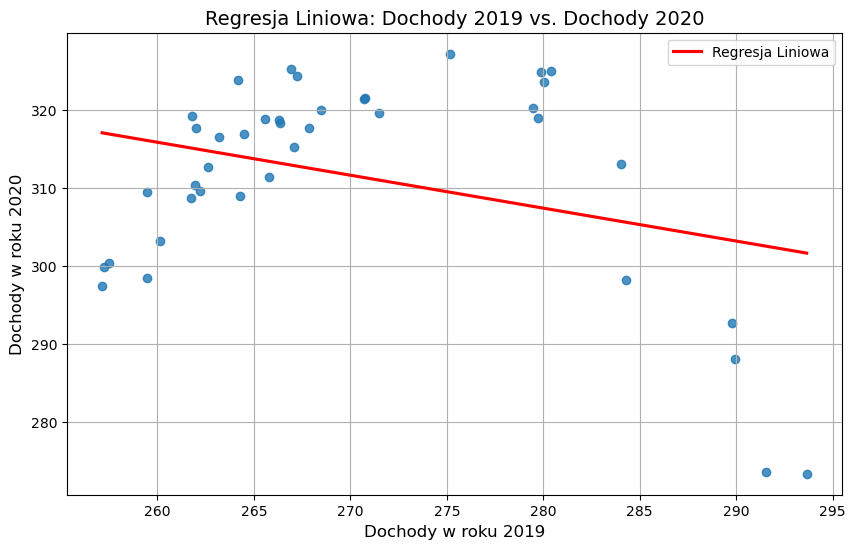

In [48]:
# Wykres regresji liniowej dla danych z 2019 i 2020 roku
plt.figure(figsize=(10, 6))
sns.regplot(x=X, y=y, ci=None, line_kws={"color": "red", "label": "Regresja Liniowa"})

# Dodanie tytułów i etykiet
plt.title("Regresja Liniowa: Dochody 2019 vs. Dochody 2020", fontsize=14)
plt.xlabel("Dochody w roku 2019", fontsize=12)
plt.ylabel("Dochody w roku 2020", fontsize=12)
plt.legend()
plt.grid(True)

# Wyświetlenie wykresu
plt.show()

Tylko 10.9% zmienności dochodów w roku następującym jest wyjaśniane przez dochody w roku poprzedzającym. Model ma bardzo niską siłę wyjaśniającą. Hipoteza zerowa, że dochody w roku poprzedzającym nie mają znaczącego wpływu na dochody w roku następującym, zostaje odrzucona.